In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from numpy import asarray
import tensorflow as tf
from tensorflow.keras.models import load_model

In [3]:
print(tf.__version__)

2.17.1


In [4]:
SOURCE = '/content/drive/MyDrive/TasteTrip/Production/v2'

# Main dataset
# DATASET_PATH = os.path.join(SOURCE, "raw_dataset")

# Split dataset
SPLIT_DATASET_PATH = os.path.join(SOURCE, "split_dataset_4_v2")

TRAIN_PATH = os.path.join(SPLIT_DATASET_PATH, 'train')
VAL_PATH = os.path.join(SPLIT_DATASET_PATH, 'val')
TEST_PATH = os.path.join(SPLIT_DATASET_PATH, 'test')

# Food Categories
FOOD_LIST = sorted(os.listdir(TRAIN_PATH)) # Remember to always SORT
NUM_OF_FOOD = len(FOOD_LIST)

print('Food total:', NUM_OF_FOOD)

print('\nFood category:', FOOD_LIST)

Food total: 10

Food category: ['ayam_goreng', 'bakso', 'bubur', 'gado_gado', 'mie_ayam', 'nasi_goreng', 'nasi_padang', 'rawon', 'sate_ayam', 'soto_ayam']


In [5]:
model_path = os.path.join(SOURCE, 'best', 'dev_EfficientNetV2S_model.keras')

model = load_model(model_path)

In [6]:
def preprocess_image_as_array(path, show_output):
    im = Image.open(path).convert('RGB')
    im = im.resize((384, 384))

    image_as_array = np.expand_dims(asarray(im), axis=0)
    scaled_image_as_array = np.true_divide(image_as_array, 255)

    if show_output:
        print('Image {} completed process.'.format(path))
        plt.figure(figsize=(5, 5))
        plt.imshow(im)
        plt.axis('off')
    return scaled_image_as_array

def preprocess_and_predict(image_path, show_output=True, show_pred=True, verbose=1):
    image_as_array = preprocess_image_as_array(image_path, show_output)
    pred = model.predict(image_as_array, verbose=verbose)

    sorted_ranks = np.flip(np.argsort(pred[0]))

    if verbose == 0:
      return FOOD_LIST[sorted_ranks[0]]

    if show_output:
        print('Food Predict:')
        highest_rank = sorted_ranks[0]
        print('Result: {:16} \nAccuracy: {:.3f}'.format(FOOD_LIST[highest_rank], pred[0][highest_rank]))

    if show_pred:
      print('\nAll Prediction:')
      for i in sorted_ranks:
        print('{}: {:.3f}'.format(FOOD_LIST[i], pred[0][i]))

    print('')

Image /content/soto1.webp completed process.
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
Food Predict:
Result: soto_ayam        
Accuracy: 0.725

All Prediction:
soto_ayam: 0.725
bubur: 0.245
mie_ayam: 0.009
nasi_padang: 0.009
gado_gado: 0.006
bakso: 0.003
sate_ayam: 0.001
ayam_goreng: 0.001
nasi_goreng: 0.001
rawon: 0.000



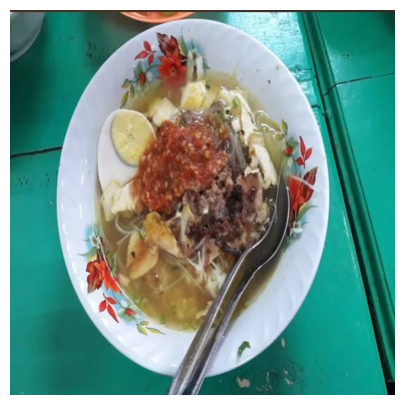

In [ ]:
preprocess_and_predict('/content/soto1.webp')

Image /content/bubur3.webp completed process.
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Food Predict:
Result: bubur            
Accuracy: 0.972

All Prediction:
bubur: 0.972
soto_ayam: 0.026
bakso: 0.001
mie_ayam: 0.001
rawon: 0.000
gado_gado: 0.000
nasi_goreng: 0.000
ayam_goreng: 0.000
nasi_padang: 0.000
sate_ayam: 0.000



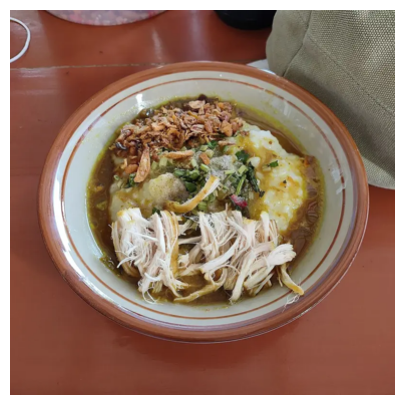

In [7]:
preprocess_and_predict('/content/bubur3.webp')

Image /content/nasgor.jpg completed process.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 899ms/step
Food Predict:
Result: nasi_goreng      
Accuracy: 0.808

All Prediction:
nasi_goreng: 0.808
bubur: 0.126
nasi_padang: 0.054
gado_gado: 0.010
mie_ayam: 0.001
bakso: 0.000
soto_ayam: 0.000
ayam_goreng: 0.000
rawon: 0.000
sate_ayam: 0.000



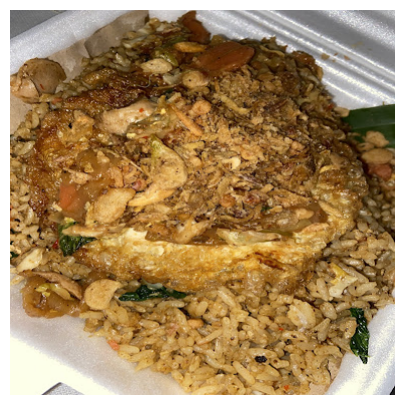

In [8]:
preprocess_and_predict('/content/nasgor.jpg', show_output=True, show_pred=True)

Image /content/ayam_goreng.jpg completed process.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
Food Predict:
Result: ayam_goreng      
Accuracy: 0.924

All Prediction:
ayam_goreng: 0.924
nasi_goreng: 0.039
nasi_padang: 0.020
sate_ayam: 0.009
bakso: 0.004
rawon: 0.003
mie_ayam: 0.001
soto_ayam: 0.000
bubur: 0.000
gado_gado: 0.000



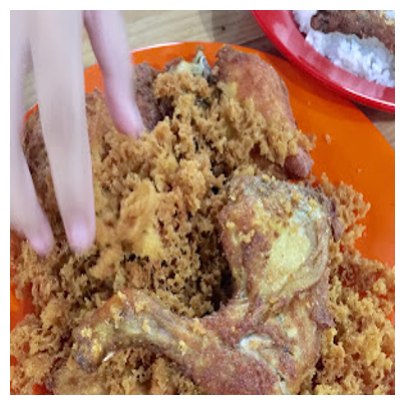

In [9]:
preprocess_and_predict('/content/ayam_goreng.jpg')

Image /content/mie-ayam.jpeg completed process.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step
Food Predict:
Result: mie_ayam         
Accuracy: 1.000

All Prediction:
mie_ayam: 1.000
soto_ayam: 0.000
bakso: 0.000
bubur: 0.000
sate_ayam: 0.000
gado_gado: 0.000
rawon: 0.000
nasi_padang: 0.000
nasi_goreng: 0.000
ayam_goreng: 0.000



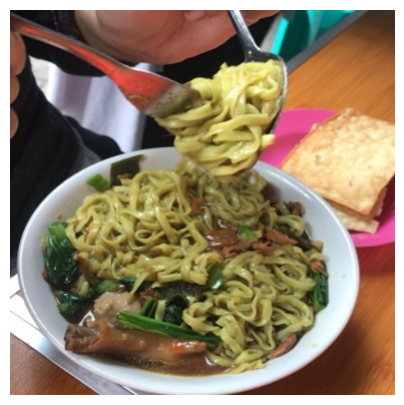

In [11]:
preprocess_and_predict('/content/mie-ayam.jpeg')

Image /content/rawon.jpg completed process.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 890ms/step
Food Predict:
Result: rawon            
Accuracy: 0.731

All Prediction:
rawon: 0.731
soto_ayam: 0.210
bakso: 0.052
mie_ayam: 0.006
bubur: 0.000
sate_ayam: 0.000
gado_gado: 0.000
nasi_padang: 0.000
ayam_goreng: 0.000
nasi_goreng: 0.000



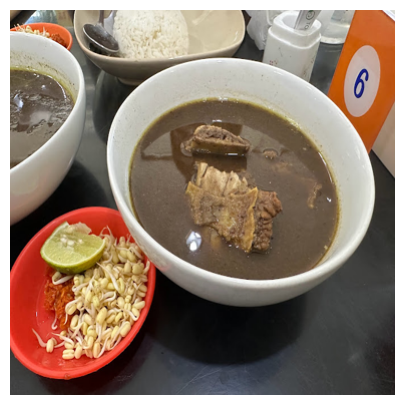

In [12]:
preprocess_and_predict('/content/rawon.jpg')

Image /content/gado-gado.webp completed process.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step
Food Predict:
Result: bubur            
Accuracy: 0.557

All Prediction:
bubur: 0.557
gado_gado: 0.423
soto_ayam: 0.012
nasi_goreng: 0.007
sate_ayam: 0.000
bakso: 0.000
rawon: 0.000
mie_ayam: 0.000
ayam_goreng: 0.000
nasi_padang: 0.000



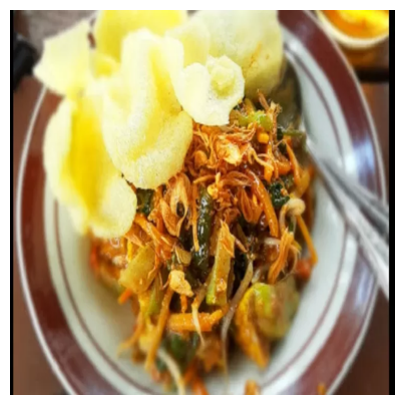

In [13]:
preprocess_and_predict('/content/gado-gado.webp')

Image /content/sate-ayam.jpg completed process.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Food Predict:
Result: sate_ayam        
Accuracy: 0.999

All Prediction:
sate_ayam: 0.999
gado_gado: 0.000
nasi_padang: 0.000
rawon: 0.000
ayam_goreng: 0.000
nasi_goreng: 0.000
soto_ayam: 0.000
mie_ayam: 0.000
bubur: 0.000
bakso: 0.000



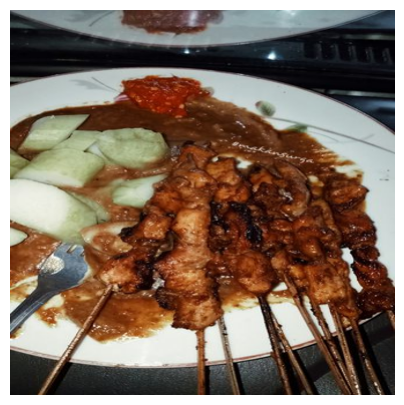

In [14]:
preprocess_and_predict('/content/sate-ayam.jpg')